Binary Information at transmitter:
[1 0 1 0 1 0 1 0 1]
Binary Information at Receiver:
[1. 0. 1. 0. 1. 0. 1. 0. 1.]


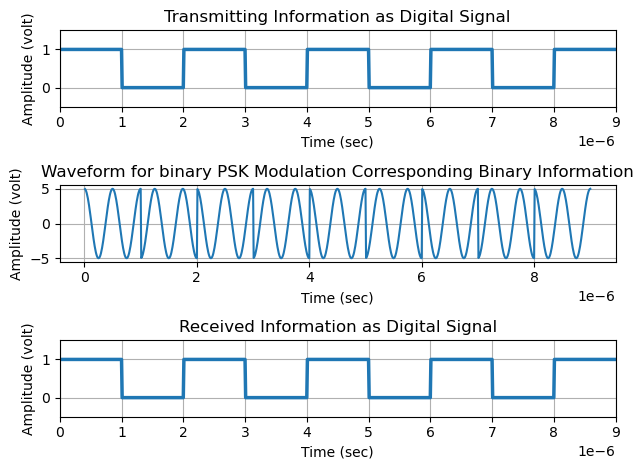

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1])
bp = 0.000001
print('Binary Information at transmitter:')
print(x)

# Representation of Transmitting binary information as digital signal
bit = np.array([])
for bit_value in x:
    if bit_value == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

t1 = np.arange(bp / 100, 100 * len(x) * (bp / 100) + bp / 100, bp / 100)

plt.subplot(311)
plt.plot(t1, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(x), -0.5, 1.5])
plt.ylabel('Amplitude (volt)')
plt.xlabel('Time (sec)')
plt.title('Transmitting Information as Digital Signal')

# Binary PSK Modulation
A = 5
br = 1 / bp
f = br * 2
t2 = np.arange(bp / 99, bp + bp / 99, bp / 99)
m = np.array([])
for bit_value in x:
    if bit_value == 1:
        y = A * np.cos(2 * np.pi * f * t2)
    else:
        y = A * np.cos(2 * np.pi * f * t2 + np.pi)
    m = np.concatenate((m, y))

t3 = np.arange(bp / 99, bp * len(x) , bp / 99)
plt.subplot(312)
plt.plot(t3, m)
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')
plt.title('Waveform for binary PSK Modulation Corresponding Binary Information')

# Binary PSK Demodulation
mn = np.array([])
for n in range(len(m) // len(t2)):
    t = np.arange(bp / 99, bp + bp / 99, bp / 99)
    y = np.cos(2 * np.pi * f * t)

    mm = y * m[(n * len(t2)):((n + 1) * len(t2))]

    z = np.trapz(mm, t)

    zz = round((2 * z / bp))

    if zz > 0:
        a = 1
    else:
        a = 0
    mn = np.append(mn, a)

print('Binary Information at Receiver:')
print(mn)

# Representation of Binary Data Into Digital Signal
bit = np.array([])
for bit_value in mn:
    if bit_value == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

t4 = np.arange(bp / 100, 100 * len(mn) * (bp / 100) + bp / 100, bp / 100)

plt.subplot(313)
plt.plot(t4, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(mn), -0.5, 1.5])
plt.ylabel('Amplitude (volt)')
plt.xlabel('Time (sec)')
plt.title('Received Information as Digital Signal')

plt.tight_layout()
plt.show()
